In [14]:
# Membuat Model Absa 

In [16]:
import pandas as pd 
import numpy as np 

In [17]:
data = pd.read_csv("Restaurants_Train_v2.csv")

In [18]:
data.shape
data.head()
#data["Sentence"][0:4]

,id,Sentence,Aspect Term,polarity,from,to
0,3121,But the staff was so horrible to us.,staff,negative,8,13
1,2777,"To be completely fair, the only redeeming fact...",food,positive,57,61
2,1634,"The food is uniformly exceptional, with a very...",food,positive,4,8
3,1634,"The food is uniformly exceptional, with a very...",kitchen,positive,55,62
4,1634,"The food is uniformly exceptional, with a very...",menu,neutral,141,145


In [19]:
# Data Pre-Processing

In [20]:
# dari hasil, tidak ada data yang kosong 
data.isnull().sum()

id             0
Sentence       0
Aspect Term    0
polarity       0
from           0
to             0
dtype: int64

In [21]:
# jumlah data duplikat, ini karena setiap kalimat bisa jadi memiliki lebih dari satu aspek 

jml_data = len(data)
print(f'Jumlah data:', jml_data)
duplikat = data['Sentence'].duplicated().sum()
print(f'Jumlah data duplikat:', duplikat)

Jumlah data: 3693
Jumlah data duplikat: 1674


In [22]:
# jumlah data unik 
unik = len(pd.unique(data['Sentence']))
print(unik)

2019


<Axes: xlabel='polarity', ylabel='count'>

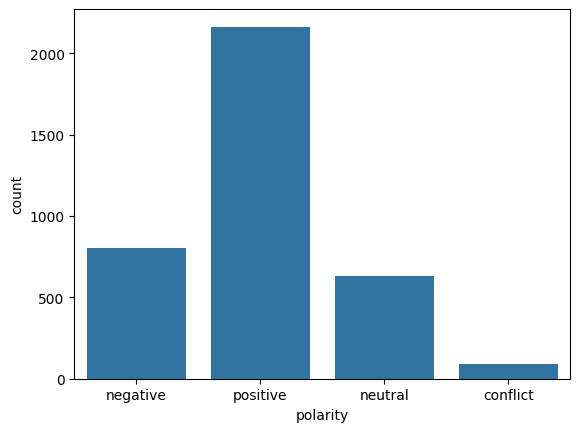

In [23]:
# Analisis 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.countplot(data=data, x='polarity')

<BarContainer object of 2 artists>

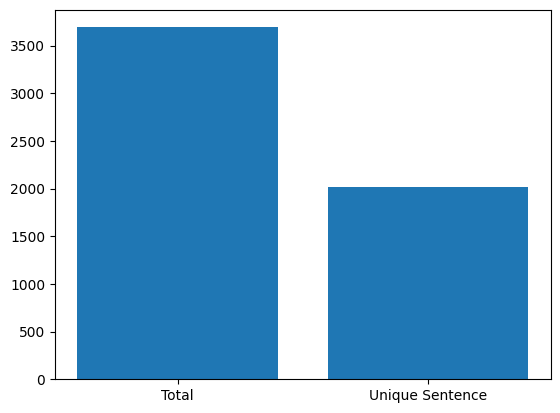

In [24]:
plt.bar(x=['Total','Unique Sentence'],height=[jml_data, unik])

In [25]:
# !pip install nltk spacy
# !python -m spacy download en_core_web_sm

membersihkan dan mempersiapkan teks agar lebih mudah dianalisis. Proses  mencakup:
1. menghapus  kata-kata umum (stopwords), tanda baca, angka, serta melakukan stemming dan tokenisasi, sehingga teks menjadi lebih terstruktur

In [26]:
import re
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('omw-1.4')
nlp = spacy.load('en_core_web_sm')

# Initialize tools
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text=text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = nltk.word_tokenize(text)

    tokens = [word for word in tokens if word not in stop_words]
    tokens = [stemmer.stem(word) for word in tokens]


   # menghapus angka
    tokens = [ word for word in tokens if not word.isdigit()]
    temp=''
    for i in tokens:
        temp=temp+i+' '
    temp.strip()
    return temp

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jatnikonm/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jatnikonm/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/jatnikonm/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/jatnikonm/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/jatnikonm/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
/home/jatnikonm/.conda/envs/itb_env/lib/python3.11/site-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.8.0) was trained with spaCy v3.8.0 and may not be 100% compatible with the current version (3.7.5). If you see errors or degraded performance, download a newer compatible model 

In [28]:
# setelah di proses bentuk kalimat akan tampak seperti ini 
print(preprocess("but the staff was is horrible to us"))#

staff horribl us 


In [29]:
# membersihkan dan memproses data teks pada kolom 'Sentence' dan 'Aspect Term' 

data["Sentence"]=[preprocess(i) for i in data["Sentence"]]
data["Aspect Term"]=[preprocess(i) for i in data["Aspect Term"]]

In [30]:
# menghitung jumlah kata dalam setiap kalimat pada kolom 'Sentence' 
# dan menyimpannya dalam kolom baru bernama word_count

word_count=[len(str(i).split(' '))-1 for i in data['Sentence']]
data['word_count']=word_count

In [31]:
data.head()

,id,Sentence,Aspect Term,polarity,from,to,word_count
0,3121,staff horribl us,staff,negative,8,13,3
1,2777,complet fair redeem factor food averag couldnt...,food,positive,57,61,10
2,1634,food uniformli except capabl kitchen proudli w...,food,positive,4,8,13
3,1634,food uniformli except capabl kitchen proudli w...,kitchen,positive,55,62,13
4,1634,food uniformli except capabl kitchen proudli w...,menu,neutral,141,145,13


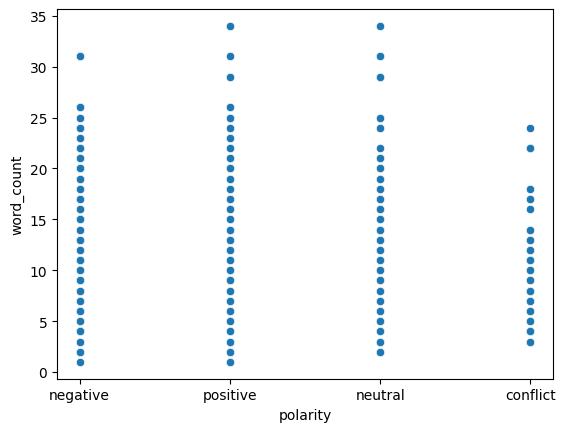

In [32]:
sns.scatterplot(data=data,x='polarity',y='word_count')
plt.show()

In [33]:
tfidf_vectorizer = TfidfVectorizer()
data['vector'] = [tfidf_vectorizer.fit_transform([i]).toarray() for i in data['Sentence']]

In [34]:
data.head()

,id,Sentence,Aspect Term,polarity,from,to,word_count,vector
0,3121,staff horribl us,staff,negative,8,13,3,"[[0.5773502691896258, 0.5773502691896258, 0.57..."
1,2777,complet fair redeem factor food averag couldnt...,food,positive,57,61,10,"[[0.31622776601683794, 0.31622776601683794, 0...."
2,1634,food uniformli except capabl kitchen proudli w...,food,positive,4,8,13,"[[0.2773500981126146, 0.2773500981126146, 0.27..."
3,1634,food uniformli except capabl kitchen proudli w...,kitchen,positive,55,62,13,"[[0.2773500981126146, 0.2773500981126146, 0.27..."
4,1634,food uniformli except capabl kitchen proudli w...,menu,neutral,141,145,13,"[[0.2773500981126146, 0.2773500981126146, 0.27..."


menghitung skor TF-IDF untuk setiap 'Aspect Term' dalam kalimat di kolom 'Sentence'. Skor ini dihitung menggunakan TfidfVectorizer untuk mengevaluasi seberapa penting 'Aspect Term' dalam konteks kalimatnya. Hasilnya disimpan dalam kolom baru bernama Aspect_TFIDF di dataset. Jika 'Aspect Term' tidak ada dalam kalimat, skornya diatur menjadi 0.

In [35]:
%%capture
def compute_aspect_tfidf(sentence, aspect_term):
    # Membersihkan Aspect Term dari spasi
    aspect_term = aspect_term.strip()
    print(aspect_term)
    
    # Inisialisasi TfidfVectorizer
    vectorizer = TfidfVectorizer()
    
    # Melakukan fit dan transformasi pada sentence
    tfidf_matrix = vectorizer.fit_transform([sentence])
    
    # Mendapatkan nama fitur (kata-kata dalam kalimat)
    feature_names = vectorizer.get_feature_names_out()
    
    # Mendapatkan skor TF-IDF sebagai array
    tfidf_scores = tfidf_matrix.toarray().flatten()
    print(feature_names.tolist())
    
    # Memeriksa apakah aspek term ada di dalam kosa kata
    if aspect_term in feature_names:
        # Mengembalikan skor TF-IDF untuk aspek term
        return tfidf_scores[feature_names.tolist().index(aspect_term)]
    else:
        # Jika aspek term tidak ada dalam kosa kata, mengembalikan 0
        return 0

# Menerapkan fungsi untuk menghitung skor TF-IDF untuk setiap aspek term
data['Aspect_TFIDF'] = [compute_aspect_tfidf(i, j) for i, j in zip(data['Sentence'], data['Aspect Term'])]

In [36]:
data.head()

,id,Sentence,Aspect Term,polarity,from,to,word_count,vector,Aspect_TFIDF
0,3121,staff horribl us,staff,negative,8,13,3,"[[0.5773502691896258, 0.5773502691896258, 0.57...",0.577350
1,2777,complet fair redeem factor food averag couldnt...,food,positive,57,61,10,"[[0.31622776601683794, 0.31622776601683794, 0....",0.316228
2,1634,food uniformli except capabl kitchen proudli w...,food,positive,4,8,13,"[[0.2773500981126146, 0.2773500981126146, 0.27...",0.277350
3,1634,food uniformli except capabl kitchen proudli w...,kitchen,positive,55,62,13,"[[0.2773500981126146, 0.2773500981126146, 0.27...",0.277350
4,1634,food uniformli except capabl kitchen proudli w...,menu,neutral,141,145,13,"[[0.2773500981126146, 0.2773500981126146, 0.27...",0.277350


In [37]:
# menghapus kolom from dan to (tidak diperlukan)
data=data.drop(['from','to'],axis=1)

Mengonversi nilai kategori pada kolom 'polarity' ('negative' = -1, 'neutral = 0', dan 'positive = 1', conflict =  2) menjadi nilai numerik 

In [38]:
def polarity_conv(i):
    if i=='negative':
        return -1
    elif i=='neutral':
        return 0
    elif i=='positive':
        return 1
    else:
        return 2
data.polarity=[polarity_conv(i) for i in data['polarity']]
data.head()

,id,Sentence,Aspect Term,polarity,word_count,vector,Aspect_TFIDF
0,3121,staff horribl us,staff,-1,3,"[[0.5773502691896258, 0.5773502691896258, 0.57...",0.577350
1,2777,complet fair redeem factor food averag couldnt...,food,1,10,"[[0.31622776601683794, 0.31622776601683794, 0....",0.316228
2,1634,food uniformli except capabl kitchen proudli w...,food,1,13,"[[0.2773500981126146, 0.2773500981126146, 0.27...",0.277350
3,1634,food uniformli except capabl kitchen proudli w...,kitchen,1,13,"[[0.2773500981126146, 0.2773500981126146, 0.27...",0.277350
4,1634,food uniformli except capabl kitchen proudli w...,menu,0,13,"[[0.2773500981126146, 0.2773500981126146, 0.27...",0.277350


In [39]:
data.to_csv('restaurant.csv')

# Modeling

Menggabungkan kolom 'Sentence' dan 'Aspect Term' menjadi satu fitur ('Combined'), mengubahnya menjadi vektor TF-IDF, lalu membagi data train dan test dengan proporsi 80% untuk pelatihan dan 20% untuk pengujian

In [40]:
from sklearn.model_selection import train_test_split
# Split into train and test
data['Combined'] = data['Sentence'] + " " + data['Aspect Term']
X = tfidf_vectorizer.fit_transform(data['Combined'])
y = data['polarity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
data.head()

,id,Sentence,Aspect Term,polarity,word_count,vector,Aspect_TFIDF,Combined
0,3121,staff horribl us,staff,-1,3,"[[0.5773502691896258, 0.5773502691896258, 0.57...",0.577350,staff horribl us staff
1,2777,complet fair redeem factor food averag couldnt...,food,1,10,"[[0.31622776601683794, 0.31622776601683794, 0....",0.316228,complet fair redeem factor food averag couldnt...
2,1634,food uniformli except capabl kitchen proudli w...,food,1,13,"[[0.2773500981126146, 0.2773500981126146, 0.27...",0.277350,food uniformli except capabl kitchen proudli w...
3,1634,food uniformli except capabl kitchen proudli w...,kitchen,1,13,"[[0.2773500981126146, 0.2773500981126146, 0.27...",0.277350,food uniformli except capabl kitchen proudli w...
4,1634,food uniformli except capabl kitchen proudli w...,menu,0,13,"[[0.2773500981126146, 0.2773500981126146, 0.27...",0.277350,food uniformli except capabl kitchen proudli w...


In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate on test set
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.6860622462787551


Memprediksi sentimen berdasarkan input sentence dan aspect dengan menggunakan model yang telah dilatih. Sentences dan aspect digabung, diubah menjadi vektor TF-IDF, lalu diklasifikasikan oleh model.

In [83]:
def predict(sentence,aspect):
    pred=model.predict(tfidf_vectorizer.transform([sentence+' '+aspect]))
    if pred[0]==-1:
        return 'Negative'
    if pred[0]==0:
        return 'Neutral'
    if pred[0]==1:
        return 'Positive'
    else :
        return 'Conflict'

In [82]:
predict('staff horribl us','staff')

'Negative'

In [ ]:
%%capture
!python -m pip install -U "setfit[absa]"
!python -m spacy download en_core_web_lg

Metode 2: 

Melakukan sentimen analisis aspek tertentu pada data restaurant (review) dengan Pre-Trained Model (deberta-v3-base-absa-v1.1). menghitung probabilitas sentimen dan mengembalikan hasil analisis dalam bentuk sentimen

In [11]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch.nn.functional as F

# Load Aspect-Based Sentiment Analysis model
absa_tokenizer = AutoTokenizer.from_pretrained("yangheng/deberta-v3-base-absa-v1.1")
absa_model = AutoModelForSequenceClassification.from_pretrained("yangheng/deberta-v3-base-absa-v1.1")



In [12]:
def analyze_aspect_sentiment(review, aspects, threshold=0.9):
    # Analyze sentiment for specified aspects in the review
    results = {}
    for aspect in aspects:
        # Check if the aspect is mentioned in the review
        if aspect.lower() in review.lower():
            inputs = absa_tokenizer(f"[CLS] {review} [SEP] {aspect} [SEP]", return_tensors="pt")
            outputs = absa_model(**inputs)
            probs = F.softmax(outputs.logits, dim=1)
            probs = probs.detach().numpy()[0]

            # Extract the label with the highest probability
            max_label, max_prob = max(zip(["negative", "neutral", "positive"], probs), key=lambda x: x[1])

            # If the probability is above the threshold, store the result in the dictionary
            if max_prob >= threshold:
                results[aspect] = (max_label, max_prob)

                # Print sentiment probabilities for the aspect
                print(f"Sentiment of aspect '{aspect}' in the sentence '{review}' is {max_label} with probability {max_prob:.4f}")
                print()

    return results

In [13]:
# Example reviews
reviews = [
    "The food was delicious but the service was terrible.",
    "The ambiance of the restaurant was great, but the staff was unfriendly.",
    "The drinks were amazing, and the staff provided excellent service."
]

# List of aspects to analyze
aspects_to_analyze = ["food", "service", "ambience", "staff", "drink", "price", "restaurant ", "behaviour", "recommendation"]

# Set the probability threshold
threshold = 0.9

# Analyze sentiment for each aspect in each review
all_results = {}
for review in reviews:
    print(f"\nAnalyzing review: {review}")
    results = analyze_aspect_sentiment(review, aspects_to_analyze, threshold)
    all_results[review] = results

# The final results
print("\nFinal results:")
for review, results in all_results.items():
    print(f"\nReview: {review}")
    for aspect, (label, prob) in results.items():
        print(f"{aspect.capitalize()} -> {label.capitalize()} with probability {prob:.4f}")


Analyzing review: The food was delicious but the service was terrible.
Sentiment of aspect 'food' in the sentence 'The food was delicious but the service was terrible.' is positive with probability 0.9977

Sentiment of aspect 'service' in the sentence 'The food was delicious but the service was terrible.' is negative with probability 0.9930


Analyzing review: The ambiance of the restaurant was great, but the staff was unfriendly.
Sentiment of aspect 'staff' in the sentence 'The ambiance of the restaurant was great, but the staff was unfriendly.' is negative with probability 0.9955

Sentiment of aspect 'restaurant ' in the sentence 'The ambiance of the restaurant was great, but the staff was unfriendly.' is neutral with probability 0.9044


Analyzing review: The drinks were amazing, and the staff provided excellent service.
Sentiment of aspect 'service' in the sentence 'The drinks were amazing, and the staff provided excellent service.' is positive with probability 0.9955

Sentiment o